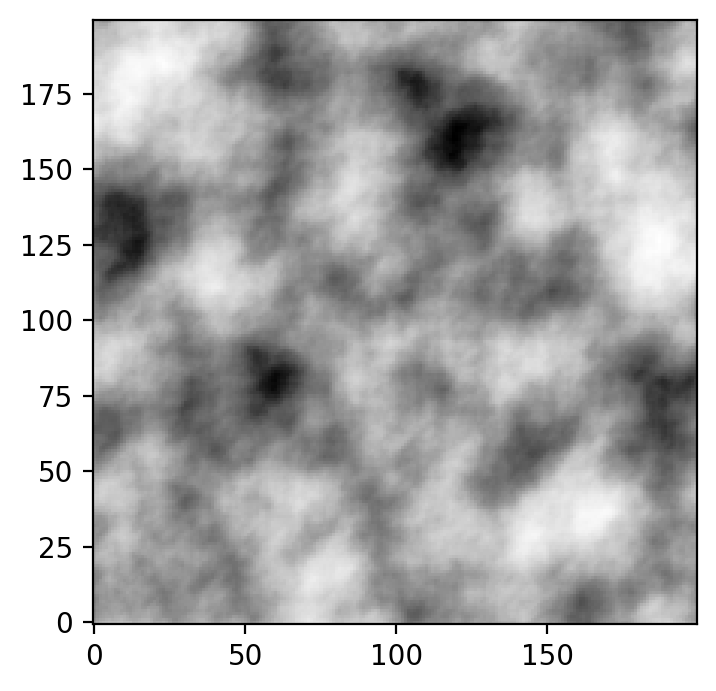

In [2]:
#Exploration of Perlin noise generation

#First create a table of 256 randomly ordered values.  These values will be used, in this order, to 
#choose the gradients placed at integer values of the noise mesh.  If necessary, these can be used 
#cyclically and repeat.  In the examples I've found the permutation table is repeated so its total
#length is 512, so I have done so here with gradtable.

gradtable = [151,160,137,91,90,15,131,13,201,95,96,53,194,233,7,225,140,36,103,
    30,69,142,8,99,37,240,21,10,23,190, 6,148,247,120,234,75,0,26,197,62,94,252,
    219,203,117,35,11,32,57,177,33,88,237,149,56,87,174,20,125,136,171,168, 68,
    175,74,165,71,134,139,48,27,166,77,146,158,231,83,111,229,122,60,211,133,230,
    220,105,92,41,55,46,245,40,244,102,143,54, 65,25,63,161, 1,216,80,73,209,76,
    132,187,208, 89,18,169,200,196,135,130,116,188,159,86,164,100,109,198,173,186,
    3,64,52,217,226,250,124,123,5,202,38,147,118,126,255,82,85,212,207,206,59,227,
    47,16,58,17,182,189,28,42,223,183,170,213,119,248,152, 2,44,154,163, 70,221,
    153,101,155,167, 43,172,9,129,22,39,253, 19,98,108,110,79,113,224,232,178,185,
    112,104,218,246,97,228,251,34,242,193,238,210,144,12,191,179,162,241, 81,51,
    145,235,249,14,239,107,49,192,214, 31,181,199,106,157,184, 84,204,176,115,121,
    50,45,127, 4,150,254,138,236,205,93,222,114,67,29,24,72,243,141,128,195,78,66,
    215,61,156,180,151,160,137,91,90,15,131,13,201,95,96,53,194,233,7,225,140,36,103,
    30,69,142,8,99,37,240,21,10,23,190, 6,148,247,120,234,75,0,26,197,62,94,252,
    219,203,117,35,11,32,57,177,33,88,237,149,56,87,174,20,125,136,171,168, 68,
    175,74,165,71,134,139,48,27,166,77,146,158,231,83,111,229,122,60,211,133,230,
    220,105,92,41,55,46,245,40,244,102,143,54, 65,25,63,161, 1,216,80,73,209,76,
    132,187,208, 89,18,169,200,196,135,130,116,188,159,86,164,100,109,198,173,186,
    3,64,52,217,226,250,124,123,5,202,38,147,118,126,255,82,85,212,207,206,59,227,
    47,16,58,17,182,189,28,42,223,183,170,213,119,248,152, 2,44,154,163, 70,221,
    153,101,155,167, 43,172,9,129,22,39,253, 19,98,108,110,79,113,224,232,178,185,
    112,104,218,246,97,228,251,34,242,193,238,210,144,12,191,179,162,241, 81,51,
    145,235,249,14,239,107,49,192,214, 31,181,199,106,157,184, 84,204,176,115,121,
    50,45,127, 4,150,254,138,236,205,93,222,114,67,29,24,72,243,141,128,195,78,66,
    215,61,156,180]

import math
import numpy

repeat = 255

def hashinc(x):
    x = x+1
    if (x>=512):
        x = 0
    return(x)

    
def perlsmooth(t):
    return(t**3*(t*(t*6-15)+10))


def perlinterp(x,a,b):
    return(a+x*(b-a))
    
    
def dotp(hashval,x,y):
        if(hashval % 3 == 0):
            return(x+y)
        elif(hashval % 3 == 1):
            return(-x+y)
        elif(hashval % 3 == 2):
            return(x-y)
        elif(hashval % 3 == 3):
            return(-x-y)
        else:
            return(0)

def perlin(x,y):
    #if value exceeds repeat wrap
    if(x >= repeat):
        x = x%repeat
    if(y >= repeat):
        y = y%repeat
        
    #determine the unit square of the grid in which the point lies
    xi = math.floor(x)
    yi = math.floor(y)
    #calculate right/top side of square
    xir = xi+1
    yir = yi+1
    if(xir >= repeat):
        xir = xir%repeat
    if(yir >= repeat):
        yir = yir%repeat
    
    #find the offset inside the unit square of the point
    xo = x-xi
    yo = y-yi
    
    #apply smoothing function
    xos = perlsmooth(xo)
    yos = perlsmooth(yo)
    
    #Hash function
    aa = gradtable[gradtable[xi]+yi];
    ab = gradtable[gradtable[xi]+hashinc(yi)];
    ba = gradtable[gradtable[hashinc(xi)]+yi];
    bb = gradtable[gradtable[hashinc(xi)]+hashinc(yi)];
    
    #now calculate and interpolate horizontally first, then vertically
    
    x1 = perlinterp(xos,dotp(aa,xo,yo),dotp(ba,xo-1,yo))
    x2 = perlinterp(xos,dotp(ab,xo,yo-1),dotp(bb,xo-1,yo-1))
    x3 = perlinterp(yos,x1,x2)
    
    return(x3)
    
    
#create grid to try it out
#Lets go ahead and make a list of all the noise points

gridsize = 10
othersize = 20

noisepoints2D = []
for j in range(gridsize*othersize):
    dummy = []
    for k in range(gridsize*othersize):
        dummy.append([j/50,k/50])
    noisepoints2D.append(dummy)
    
noisegrid2D = []
#create empty noise gird
for j in range(gridsize*othersize):
    dummy = []
    for k in range(gridsize*othersize):
        dummy.append(0)
    noisegrid2D.append(dummy)
    
#Now try it out.  I think I need to rework my noisepoints for a double loop
#need sizes of array, lets not assume square
sizex = numpy.shape(numpy.array(noisepoints2D))[0]
sizey = numpy.shape(numpy.array(noisepoints2D))[1] 
    
#now generate noise
amplitude = 1
persistence = .5
maxval = 0
for j in range(sizex):
    for k in range(sizey):
        maxval = 0
        amplitude = 1
        for i in range(6):
            #adding octave summing
            noisegrid2D[j][k] += (perlin(noisepoints2D[j][k][0]*2**i,noisepoints2D[j][k][1]*2**i))*amplitude
            maxval += amplitude
            amplitude *= persistence
            #print(maxval)
        noisegrid2D[j][k] *= 1/maxval


        
import matplotlib as mpl
import matplotlib.pyplot as plt
default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi*2
    
plt.imshow(noisegrid2D,cmap = 'Greys', origin = 'lower')    
